###  Connecting to and using databases with ODBC
    
***
    
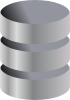

Information at https://www.rdocumentation.org/packages/RODBC/versions/1.3-17

## This notebook and code are for demonstration only!!!  Make sure you test the code and change as needed to meet your organizations standards.  DO NOT save user ids and passwords in a notebook!

In [ ]:
install.packages("RODBC", repos='http://cran.us.r-project.org')

# CRAN Mirros List: https://cran.r-project.org/mirrors.html

### For information on ODBC Drivers, see 
https://db.rstudio.com/best-practices/drivers/

### Microsoft ODBC Drivers...
https://docs.microsoft.com/en-us/sql/connect/odbc/download-odbc-driver-for-sql-server?view=sql-server-ver15

In [189]:
require(RODBC)

# Helped from: http://stackoverflow.com/questions/20310261/read-data-from-microsoft-sql-database-on-remote-desktop-via-r
# By: Sudip Kafle at http://stackoverflow.com/users/1159766/sudip-kafle

ufn_get_connection <- function(host, db, user=NULL, pass=NULL )
{
 
  if(is.null(pass)) 
  {     
    c <- odbcDriverConnect(
         connection=paste0("server=",host,
                           ";database=",db,
                           ";trusted_connection=true;Port=1433;driver={SQL Server};TDS_Version=7.0;"))
  }
  else
  {
    c <- odbcDriverConnect(
         connection=paste0("server=",host,
                           ";database=",db,
                           ";uid=",user,
                           ";pwd=",pass,
                           ";trusted_connection=true;Port=1433;driver={SQL Server};TDS_Version=7.0;"))
  }
  
    if(class(c) == 'RODBC') 
    {  
      writeLines("Successfilly opened connection to db")
      return(c)
    } 
    else
    {
      writeLines(paste0("Error opening connection: ", as.character(c)))
    }
  
}

In [190]:
#  Connection with integrated security...
myisconnection <- ufn_get_connection ("DESKTOP-TG2VLSU\\SQL2017", "AdventureWorksDW2017")

Successfilly opened connection to db


In [191]:
#  Get column list...
head(sqlColumns(myisconnection, "dbo.DimDate"))

TABLE_CAT            TABLE_SCHEM TABLE_NAME COLUMN_NAME          DATA_TYPE
1 AdventureWorksDW2017 dbo         DimDate    DateKey               4       
2 AdventureWorksDW2017 dbo         DimDate    FullDateAlternateKey -9       
3 AdventureWorksDW2017 dbo         DimDate    DayNumberOfWeek      -6       
4 AdventureWorksDW2017 dbo         DimDate    EnglishDayNameOfWeek -9       
5 AdventureWorksDW2017 dbo         DimDate    SpanishDayNameOfWeek -9       
6 AdventureWorksDW2017 dbo         DimDate    FrenchDayNameOfWeek  -9       
  TYPE_NAME COLUMN_SIZE BUFFER_LENGTH DECIMAL_DIGITS NUM_PREC_RADIX NULLABLE
1 int       10           4             0             10             0       
2 date      10          20            NA             NA             0       
3 tinyint    3           1             0             10             0       
4 nvarchar  10          20            NA             NA             0       
5 nvarchar  10          20            NA             NA             0       
6 nvarchar  10          20            NA             NA             0       
  REMARKS COLUMN_DEF SQL_DATA_TYPE SQL_DATETIME_SUB CHAR_OCTET_LENGTH
1 NA      NA          4            NA               NA               
2 NA      NA         -9            NA               NA               
3 NA      NA         -6            NA               NA               
4 NA      NA         -9            NA               20               
5 NA      NA         -9            NA               20               
6 NA      NA         -9            NA               20               
  ORDINAL_POSITION IS_NULLABLE SS_DATA_TYPE
1 1                NO          56          
2 2                NO          0           
3 3                NO          48          
4 4                NO          39          
5 5                NO          39          
6 6                NO          39

In [192]:
close(myisconnection)  # Closed the connection when done!

In [193]:
#  Connection with integrated security...
myssconnection <- ufn_get_connection ("localhost", 
                                      "AdventureWorksDW2017", 
                                      'user', 'password')

Successfilly opened connection to db


In [194]:
sqlQuery(myssconnection, 
"select top 3 productkey, 
productsubcategorykey, 
englishproductname as product 
from dbo.DimProduct")

productkey productsubcategorykey product        
1 1          NA                    Adjustable Race
2 2          NA                    Bearing Ball   
3 3          NA                    BB Ball Bearing

In [195]:
# Get column information...
sqlColumns(myssconnection, "dimproductcategory")

TABLE_CAT            TABLE_SCHEM TABLE_NAME        
1 AdventureWorksDW2017 dbo         DimProductCategory
2 AdventureWorksDW2017 dbo         DimProductCategory
3 AdventureWorksDW2017 dbo         DimProductCategory
4 AdventureWorksDW2017 dbo         DimProductCategory
5 AdventureWorksDW2017 dbo         DimProductCategory
  COLUMN_NAME                 DATA_TYPE TYPE_NAME    COLUMN_SIZE BUFFER_LENGTH
1 ProductCategoryKey           4        int identity 10            4          
2 ProductCategoryAlternateKey  4        int          10            4          
3 EnglishProductCategoryName  -9        nvarchar     50          100          
4 SpanishProductCategoryName  -9        nvarchar     50          100          
5 FrenchProductCategoryName   -9        nvarchar     50          100          
  DECIMAL_DIGITS NUM_PREC_RADIX NULLABLE REMARKS COLUMN_DEF SQL_DATA_TYPE
1  0             10             0        NA      NA          4           
2  0             10             1        NA      NA          4           
3 NA             NA             0        NA      NA         -9           
4 NA             NA             0        NA      NA         -9           
5 NA             NA             0        NA      NA         -9           
  SQL_DATETIME_SUB CHAR_OCTET_LENGTH ORDINAL_POSITION IS_NULLABLE SS_DATA_TYPE
1 NA                NA               1                NO          56          
2 NA                NA               2                YES         38          
3 NA               100               3                NO          39          
4 NA               100               4                NO          39          
5 NA               100               5                NO          39

In [196]:
# Do a query... Notice we can use database specific SQL syntax, i.e. top x. 
sqlQuery(myssconnection, 
         "select top 5 productkey, productsubcategorykey, englishproductname as product 
         from dbo.DimProduct", rows_at_time = 100, errors = TRUE)

productkey productsubcategorykey product              
1 1          NA                    Adjustable Race      
2 2          NA                    Bearing Ball         
3 3          NA                    BB Ball Bearing      
4 4          NA                    Headset Ball Bearings
5 5          NA                    Blade

### row_at_time
From https://www.rdocumentation.org/packages/RODBC/versions/1.3-17/topics/sqlQuery

Modern drivers should work (and work faster, especially if communicating with a remote machine) with rows_at_time = 100, the usual default, or more. (However, some drivers may mis-fetch multiple rows, in which case set rows_at_time = 1 when creating the connection.) 

In [198]:
# Do a query...
awproductDF <- sqlQuery(myssconnection, 
"select productkey, 
productsubcategorykey, 
englishproductname as product 
from dbo.DimProduct", rows_at_time = 100, errors = TRUE)

In [199]:
head(awproductDF)

productkey productsubcategorykey product              
1 1          NA                    Adjustable Race      
2 2          NA                    Bearing Ball         
3 3          NA                    BB Ball Bearing      
4 4          NA                    Headset Ball Bearings
5 5          NA                    Blade                
6 6          NA                    LL Crankarm

### We can make the querie as complex as we like. 

In [200]:
sql = '
SELECT pc.EnglishProductCategoryName as Category, 
       EnglishProductSubcategoryName as SubCategory,
       p.EnglishProductName as Product,
       SUM(SalesAmount) as SalesAmount
FROM  dbo.factinternetsales          s
JOIN  dbo.DimProduct                p
  on  (s.ProductKey = p.ProductKey) 
JOIN  dbo.DimProductSubcategory      sc
  ON  (p.ProductSubcategoryKey = sc.ProductSubcategoryKey)
JOIN  dbo.DimProductCategory         pc
  ON  (sc.ProductCategoryKey = pc.ProductCategoryKey)
GROUP BY pc.EnglishProductCategoryName,
         EnglishProductSubcategoryName,
         p.EnglishProductName
'

In [201]:
head(sqlQuery(myssconnection, sql))

Category    SubCategory       Product                SalesAmount
1 Accessories Bike Racks        Hitch Rack - 4-Bike    39360.00   
2 Accessories Bike Stands       All-Purpose Bike Stand 39591.00   
3 Accessories Bottles and Cages Mountain Bottle Cage   20229.75   
4 Accessories Bottles and Cages Road Bottle Cage       15390.88   
5 Accessories Bottles and Cages Water Bottle - 30 oz.  21177.56   
6 Accessories Cleaners          Bike Wash - Dissolver   7218.60

In [202]:
sql = '
CREATE OR ALTER VIEW salessummary as 
SELECT pc.EnglishProductCategoryName as Category, 
       EnglishProductSubcategoryName as SubCategory,
       p.EnglishProductName as Product,
       SUM(SalesAmount) as SalesAmount
FROM  dbo.factinternetsales          s
JOIN  dbo.DimProduct                p
  on  (s.ProductKey = p.ProductKey) 
JOIN  dbo.DimProductSubcategory      sc
  ON  (p.ProductSubcategoryKey = sc.ProductSubcategoryKey)
JOIN  dbo.DimProductCategory         pc
  ON  (sc.ProductCategoryKey = pc.ProductCategoryKey)
GROUP BY pc.EnglishProductCategoryName,
         EnglishProductSubcategoryName,
         p.EnglishProductName
'

In [203]:
sqlQuery(myssconnection, sql)

character(0)

In [204]:
sqlQuery(myssconnection, 'SELECT top 3 * FROM salessummary')

Category    SubCategory     Product                 SalesAmount
1 Bikes       Road Bikes      Road-650 Red, 62        57381.98   
2 Bikes       Mountain Bikes  Mountain-500 Silver, 44 22034.61   
3 Accessories Tires and Tubes ML Mountain Tire        34818.39

In [205]:
#  Create a dataframe to save to the database...
salessummaryDF = sqlQuery(myssconnection, 'SELECT * FROM dbo.salessummary')

In [206]:
sqlQuery(myssconnection, 'DROP TABLE IF EXISTS dbo.salessummarydftable')

character(0)

In [208]:
sqlSave(myssconnection, salessummaryDF, "salessummarydftable", rownames = FALSE, addPK=TRUE)

ERROR: Error in sqlSave(myssconnection, salessummaryDF, "salessummarydftable", : table 'salessummarydftable' already exists


In [209]:
sqlQuery(myssconnection, 'SELECT top 3 * FROM salessummarydftable')

Category    SubCategory       Product                SalesAmount
1 Accessories Bike Racks        Hitch Rack - 4-Bike    39360.00   
2 Accessories Bike Stands       All-Purpose Bike Stand 39591.00   
3 Accessories Bottles and Cages Mountain Bottle Cage   20229.75

### Create tables in SQL Server from queries...

In [212]:
sqlQuery(myssconnection, 'DROP TABLE IF EXISTS dbo.salessummarytable')

character(0)

In [210]:
sql = '  
SELECT pc.EnglishProductCategoryName as Category, 
       EnglishProductSubcategoryName as SubCategory,
       p.EnglishProductName as Product,
       SUM(SalesAmount) as SalesAmount
INTO dbo.salessummarytable
FROM  dbo.factinternetsales          s
JOIN  dbo.DimProduct                 p
  on  (s.ProductKey = p.ProductKey) 
JOIN  dbo.DimProductSubcategory      sc
  ON  (p.ProductSubcategoryKey = sc.ProductSubcategoryKey)
JOIN  dbo.DimProductCategory         pc
  ON  (sc.ProductCategoryKey = pc.ProductCategoryKey)
GROUP BY pc.EnglishProductCategoryName,
         EnglishProductSubcategoryName,
         p.EnglishProductName '

In [213]:
sqlQuery(myssconnection, sql)

character(0)

In [214]:
sqlQuery(myssconnection, 'select top 3 * from dbo.salessummarytable')

Category    SubCategory       Product                SalesAmount
1 Accessories Bike Racks        Hitch Rack - 4-Bike    39360.00   
2 Accessories Bike Stands       All-Purpose Bike Stand 39591.00   
3 Accessories Bottles and Cages Mountain Bottle Cage   20229.75

In [215]:
#  Connection with integrated security...
myisspconnection <- ufn_get_connection ("DESKTOP-TG2VLSU\\SQL2017", "AdventureWorks2017")

Successfilly opened connection to db


### We can call stored procedures too...

In [216]:
sqlQuery(myisspconnection,"EXEC dbo.uspGetEmployeeManagers @BusinessEntityID = 10")

RecursionLevel BusinessEntityID FirstName LastName   OrganizationNode
1 0              10               Michael   Raheem     /1/1/4/3/       
2 1               7               Dylan     Miller     /1/1/4/         
3 2               3               Roberto   Tamburello /1/1/           
  ManagerFirstName ManagerLastName
1 Dylan            Miller         
2 Roberto          Tamburello     
3 Terri            Duffy

### Close your connections when done!!!

In [217]:
close(myisspconnection)

In [ ]:
close(myisconnection)

In [219]:
odbcCloseAll()